<a href="https://colab.research.google.com/github/BenjaminDKLuong/Colab_Notes/blob/master/Predicting_stock_prices_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting stock prices with neural networks

In [1]:
!git clone https://github.com/PacktPublishing/Python-Deep-Learning-Solutions-.git

Cloning into 'Python-Deep-Learning-Solutions-'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 175 (delta 0), reused 0 (delta 0), pack-reused 166
Receiving objects: 100% (175/175), 18.61 MiB | 30.88 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [0]:
# change working directory to new location
import os
os.chdir("/content/Python-Deep-Learning-Solutions-/Section05")


In [5]:
# check current working directory
%pwd

'/content/Python-Deep-Learning-Solutions-/Section05'

## Import Data

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [8]:
data = pd.read_csv('Data/stock-data.csv')
# Reorder the columns for convenience
data = data[['Open', 'High', 'Low', 'Volume', 'Close']]
data.head()

,Open,High,Low,Volume,Close
0,3471.949951,4073.729980,3459.850098,33352380000,3966.110107
1,3950.590088,4289.060059,3615.790039,30916110000,3766.989990
2,3760.949951,4208.729980,3521.139893,33222920000,4206.350098
3,4252.149902,4259.870117,3614.659912,34727330000,3672.820068
4,3714.479980,3714.479980,3026.110107,44129010000,3369.629883


In [0]:
sequence_length = 21 # 20 preceeding inputs
n_features = len(data.columns)
val_ratio = 0.1
n_epochs = 300
batch_size = 512

In [10]:
data = data.as_matrix()
data_processed = []
for index in range(len(data) - sequence_length):
    data_processed.append(data[index : index + sequence_length])
data_processed = np.array(data_processed)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [12]:
val_split = round((1-val_ratio) * data_processed.shape[0])
train = data_processed[: int(val_split), :]
val = data_processed[int(val_split) :, :]

print('Training data: {}'.format(train.shape))
print('Validation data: {}'.format(val.shape))

Training data: (165, 21, 5)
Validation data: (18, 21, 5)


In [13]:
train_samples, train_nx, train_ny = train.shape
val_samples, val_nx, val_ny = val.shape

train = train.reshape((train_samples, train_nx * train_ny))
val = val.reshape((val_samples, val_nx * val_ny))

print('Training data: {}'.format(train.shape))
print('Validation data: {}'.format(val.shape))
print()

# convert input to [0,1]
preprocessor = MinMaxScaler().fit(train)
train = preprocessor.transform(train)
val = preprocessor.transform(val)

train = train.reshape((train_samples, train_nx, train_ny))
val = val.reshape((val_samples, val_nx, val_ny))

print('Training data: {}'.format(train.shape))
print('Validation data: {}'.format(val.shape))

Training data: (165, 105)
Validation data: (18, 105)

Training data: (165, 21, 5)
Validation data: (18, 21, 5)


In [16]:
train[:, : -1].shape

(165, 20, 5)

In [21]:
train[:, -1][: ,-1].shape

(165,)

In [0]:
X_train = train[:, : -1] #left out the last row
y_train = train[:, -1][: ,-1] # select the last row, then select last number of that

X_val = val[:, : -1]
y_val = val[:, -1][ : ,-1]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], n_features))

In [23]:
X_train.shape

(165, 20, 5)

## Model


In [24]:
model = Sequential()
model.add(LSTM(input_shape=(X_train.shape[1:]), units = 128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(units=1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=1
    )

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
165/165 [==============================] - 3s 21ms/step - loss: 0.2080
Epoch 2/300
165/165 [==============================] - 0s 356us/step - loss: 0.1033
Epoch 3/300
165/165 [==============================] - 0s 364us/step - loss: 0.0390
Epoch 4/300
165/165 [==============================] - 0s 364us/step - loss: 0.0119
Epoch 5/300
165/165 [==============================] - 0s 377us/step - loss: 0.0355
Epoch 6/300
165/165 [==============================] - 0s 361us/step - loss: 0.0412
Epoch 7/300
165/165 [==============================] - 0s 359us/step - loss: 0.0228
Epoch 8/300
165/165 [==============================] - 0s 363us/step - loss: 0.0112
Epoch 9/300
165/165 [==============================] - 0s 349us/step - loss: 0.0092
Epoch 10/300
165/165 [==============================] - 0s 411us/step - loss: 0.0146
Epoch 11/300
165/165 [==============================] - 0s 371us/step - loss: 0.0172
Epoch 12/300
165/165 [=====

## Predict

In [0]:
preds_val = model.predict(X_val)
diff = []
for i in range(len(y_val)):
    pred = preds_val[i][0]
    diff.append(y_val[i] - pred)

In [29]:
preds_val[0][0]

0.9660213

In [30]:
y_val[0]

0.9950432826389483

### Convert the predict back to original meaning (before MinMaxScaler)

In [31]:
real_min = preprocessor.data_min_[104]
real_max = preprocessor.data_max_[104]

print(preprocessor.data_min_[104])
print(preprocessor.data_max_[104])

preds_real = preds_val * (real_max - real_min) + real_min
y_val_real = y_val * (real_max - real_min) + real_min

1172.060059
5128.279785


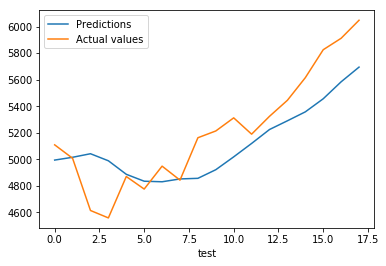

In [32]:
plt.plot(preds_real, label='Predictions')
plt.plot(y_val_real, label='Actual values')
plt.xlabel('test')
plt.legend(loc=0)
plt.show()